In [11]:
import nmrglue as ng
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm


def bruker_to_pipe(bruker_path):
    # read in the Bruker data
    dic,data = ng.bruker.read_pdata(bruker_path)
    u = ng.bruker.guess_udic(dic, data)
    

    left_1h = dic['procs']['OFFSET']    
    sw_ppm_1h = dic['procs']['SW_p']/u[1]['obs']
    right_1h = left_1h - sw_ppm_1h


    left_15n = dic['proc2s']['OFFSET']
    sw_ppm_15n = dic['proc2s']['SW_p']/u[0]['obs']
    right_15n = left_15n - sw_ppm_15n

   

        # Direct Dimsion                       #Indirect Dimension
    ##u[1]['size']     = 768              ;  u[0]['size']     = 600
    ##u[1]['complex']  = True             ;  u[0]['complex']  = True 
    ##u[1]['encoding'] = 'direct'         ;  u[0]['encoding'] = 'states'
    ##u[1]['sw']       = 11061.947        ;  u[0]['sw']       = 4000.000
    ##u[1]['obs']      = 800.134          ;  u[0]['obs']      = 201.204
    ##u[1]['car']      = 4.7 * 800.134  ;  u[0]['car']      = 58.742 * 201.204
    ##u[1]['label']    = '1H'             ;  u[0]['label']    = '13C'            
    ##
    # create the converter object and initilize with Bruker data
    C = ng.convert.converter()
    C.from_bruker(dic, data, u)

    # create NMRPipe data and then write it out
    ng.pipe.write("2d_pipe.ft", *C.to_pipe(), overwrite=True)
    return left_1h, right_1h, left_15n, right_15n



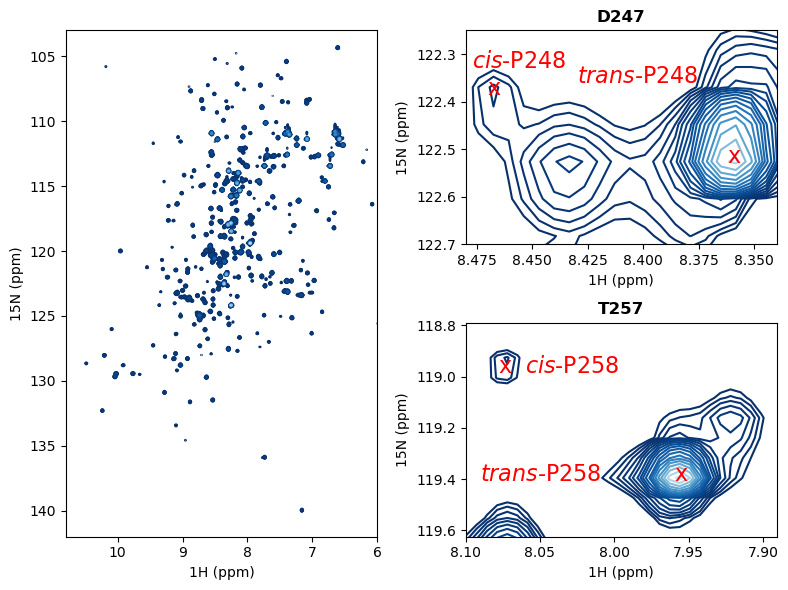

In [139]:
pdata_path = '../../../NMR_data/data/800/nmr/Full-length CelS2/127/pdata/1'
left_1h, right_1h, left_15n, right_15n = bruker_to_pipe(pdata_path)

# plot parameters
cmap = matplotlib.cm.Blues_r    # contour map (colors to use for contours)
contour_start = 100000          # contour level start value
contour_num = 20                # number of contour levels
contour_factor = 1.20           # scaling factor between contour levels

# calculate contour levels
cl = [contour_start * contour_factor ** x for x in range(contour_num)]

# read in the data from a NMRPipe file

dic, data = ng.pipe.read("2d_pipe.ft")


# create the figure
fig, ax = plt.subplot_mosaic([['a', 'b'],\
                              ['a', 'c']],\
                             figsize=(8,6))

# plot the contours
#ax.contour(data, cl, cmap=cmap)
for a in ax:
    ax[a].contour(data, cl, cmap=cmap, \
               extent=(left_1h, right_1h, left_15n, right_15n))
    # decorate the axes
    ax[a].set_ylabel("15N (ppm)")
    ax[a].set_xlabel("1H (ppm)")
shift=0.047

ax['a'].set_xlim(10.8, 6)
ax['a'].set_ylim(142, 103)
#ax['a'].text(8.362, 122.483+shift, "x", size=16, color='r')


ax['b'].set_title(f'D{213+34}', weight='bold')
ax['b'].set_xlim(8.48, 8.34)
ax['b'].set_ylim(122.7, 122.25)
ax['b'].text(8.362, 122.483+shift, "x", size=16, color='r')
ax['b'].text(8.43, 122.36, r"$trans$-P248", size=16, color='r')
ax['b'].text(8.47, 122.34+shift, "x", size=16, color='r')
ax['b'].text(8.477, 122.33, r"$cis$-P248", size=16, color='r')
#ax['b'].text(8.436, 122.492+shift, "x", size=16, color='k')
#ax['b'].text(8.445, 122.6, "V237", size=16, color='k')


ax['c'].set_title(f'T{223+34}', weight='bold')
ax['c'].set_xlim(8.1, 7.891)
ax['c'].set_ylim(119.625, 118.79)

ax['c'].text(7.96, 119.36+shift, "x", size=16, color='r')
ax['c'].text(8.09, 119.36+shift, r"$trans$-P258", size=16, color='r')
ax['c'].text(8.078, 118.94+shift, "x", size=16, color='r')
ax['c'].text(8.06, 118.94+shift, r"$cis$-P258", size=16, color='r')

#ax['c'].text(7.927, 119.16+shift, "x", size=16, color='k')
#ax['c'].text(7.93, 118.97+shift, "T272", size=16, color='k')


plt.tight_layout()
plt.savefig('cPro.png', dpi=300)
plt.show()

